In [1]:
psrname='J1022+1001'

In [2]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/'+psrname+'/'

In [3]:
import os
dirs=[epta_dir,einpta_dir]
for hh in range(len(dirs)):
    
    with os.scandir(dirs[hh]) as entries:
        for entry in entries:
            dirs[hh]=dirs[hh]+entry.name+'/ptmcmc/'
epta_dir,einpta_dir=dirs

In [4]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
from diff_chain import  Diff_chain_shift
sys.path.append('/media/root1/3PAR/sdandapat/work_dir')
from diff_chain import  Diff_chain_shift

2023-03-26 20:45:53.699738: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 20:45:53.750869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-26 20:45:53.751758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 20:45:54.630240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
epta_1=np.loadtxt(epta_dir+'chain_1.txt')
par_epta=pd.read_csv(epta_dir+'pars.txt', header = None)
lep=len(par_epta)
epta_2=epta_1.T

In [6]:
einpta_1=np.loadtxt(einpta_dir+'chain_1.txt')
par_einpta=pd.read_csv(einpta_dir+'pars.txt', header = None)
leinp=len(par_einpta)
einpta_2=einpta_1.T

In [7]:
epta_arr=[epta_2[lep-1],epta_2[lep-2],epta_2[lep-3],epta_2[lep-4]]

einpta_arr=[einpta_2[leinp-1],einpta_2[leinp-2],einpta_2[leinp-3],einpta_2[leinp-4]]

epta_arr_red=[epta_2[lep-1],epta_2[lep-2]]

einpta_arr_red=[einpta_2[leinp-1],einpta_2[leinp-2]]

epta_arr_dm=[epta_2[lep-3],epta_2[lep-4]]

einpta_arr_dm=[einpta_2[leinp-3],einpta_2[leinp-4]]

# Tension Considering red+dm

In [8]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-3],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

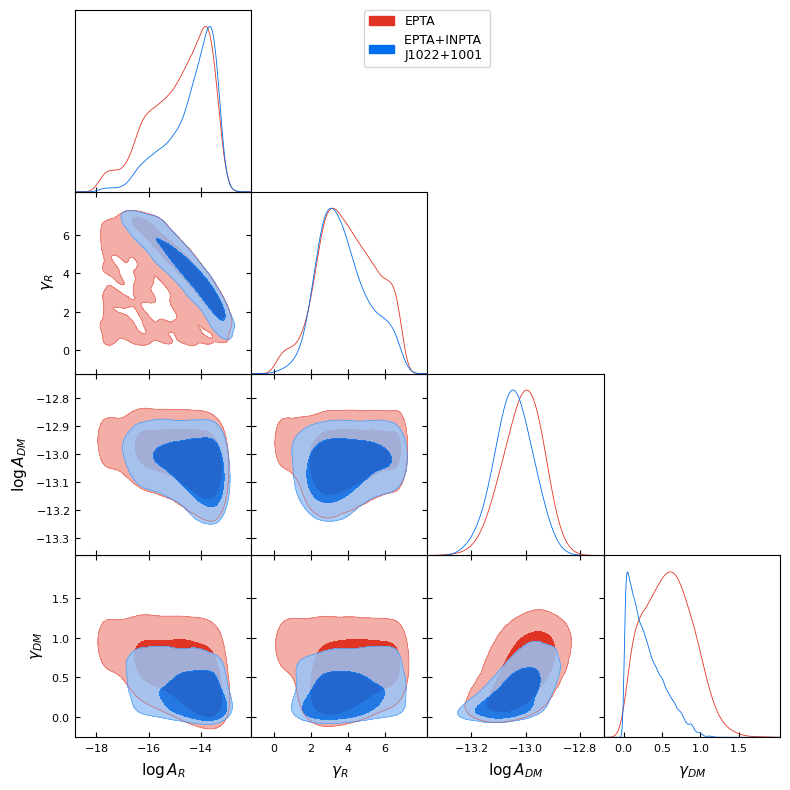

In [9]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_R_DM_SPNA_All.png',dpi=300)
plt.show()

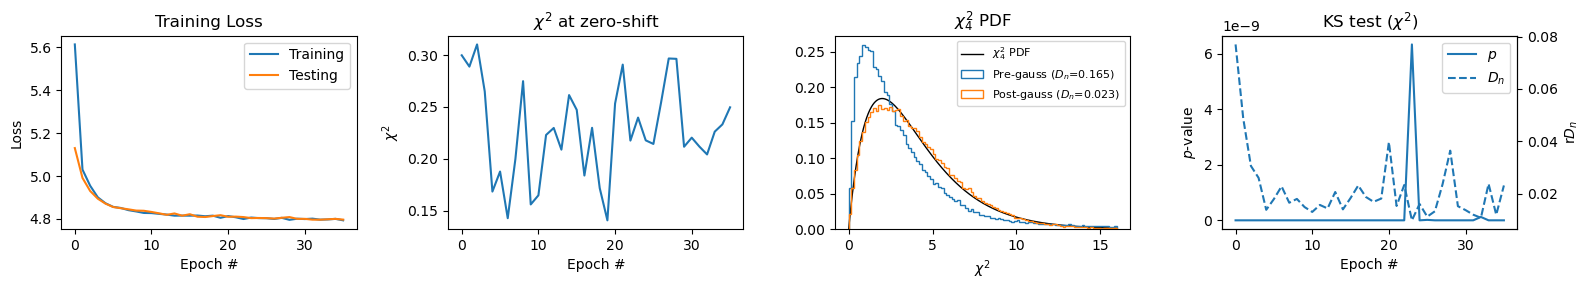

64/64 [==============================] - 22s 318ms/step - loss: 4.7936 - val_loss: 4.7969 - shift0_chi2: 0.2497 - shift0_pval: 0.0072 - shift0_nsigma: 0.0090 - chi2Z_ks: 0.0232 - chi2Z_ks_p: 4.1127e-47 - lr: 0.0100
Epoch 37/50
 1/64 [..............................] - ETA: 1:30 - loss: 4.8415

In [ ]:
%matplotlib inline
diff_chain, nsig, low,high=Diff_chain_shift(epta,einpta)

In [ ]:
%matplotlib inline
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [ ]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

epta_red=MCSamples(samples=np.array(epta_arr_red).transpose(),loglikes=epta_2[-3],names=names_r,labels=labels_r,label='EPTA')
einpta_red=MCSamples(samples=np.array(einpta_arr_red).transpose(),loglikes=einpta_2[-3],names = names_r,labels=labels_r,label='EPTA+INPTA \n'+psrname)

In [ ]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_red,einpta_red], filled=True)
plt.savefig(psrname+'_R_DM_SPNA_red.png',dpi=300)
plt.show()

In [ ]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [ ]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(epta_red,einpta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_r, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNA_red.png',dpi=300)

# Tension considering dm noise only

In [ ]:
epta_dm=MCSamples(samples=np.array(epta_arr_dm).transpose(),loglikes=epta_2[-3],names=names_r,labels=labels_r,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_arr_dm).transpose(),loglikes=einpta_2[-3],names = names_r,labels=labels_r,label='EPTA+INPTA \n'+psrname)

In [ ]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_SPNA_dm.png',dpi=300)
plt.show()

In [ ]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(epta_dm,einpta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)